In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('Numpy & Pandas/officer_kinship_song.csv')
df2 = pd.read_csv('Numpy & Pandas/officer_relationship_song.csv')

In [29]:
df2.isna().any()

[False False False False False]


In [24]:
#df1亲戚表，df2政治关系表
df2.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [3]:
#df2是政治关系表
#从表中取出以下三列，以联系进行分组，分别统计官员和社会关系人的数量
a1 = df2[['姓名', '社会关系人姓名', '联系']].groupby('联系').agg(
    {'姓名': 'nunique', '社会关系人姓名': 'nunique'}).copy()
a1

,姓名,社会关系人姓名
联系,,
不合,35,49
反对/攻讦,58,56
得到Y的支持,55,97
支持,51,49
政见趋同,21,23
遭到Y的反对/攻讦,52,111


In [4]:
a1['无去重计数'] = df2[['姓名', '联系']].groupby('联系').count()
a1

,姓名,社会关系人姓名,无去重计数
联系,,,
不合,35,49,61
反对/攻讦,58,56,78
得到Y的支持,55,97,132
支持,51,49,80
政见趋同,21,23,25
遭到Y的反对/攻讦,52,111,130


In [5]:
#不同联系的平均距离
a1 = df2[r'Distance 距离'].groupby(df2[r'联系']).mean().sort_values()
a1

联系
政见趋同         553.851090
不合           566.486530
反对/攻讦        664.581145
遭到Y的反对/攻讦    689.981035
得到Y的支持       699.818200
支持           703.809609
Name: Distance 距离, dtype: float64

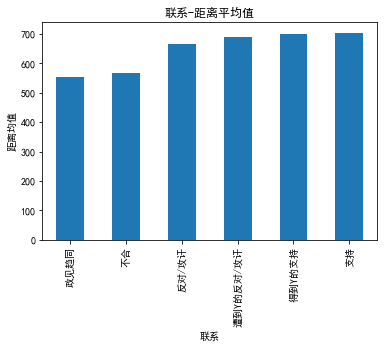

In [6]:
#绘制联系-距离平均值关系图
#方法1
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
# a1.plot(kind='barh')
a1.plot(kind='bar')
plt.title('联系-距离平均值')
plt.xlabel('联系')
plt.ylabel('距离均值')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

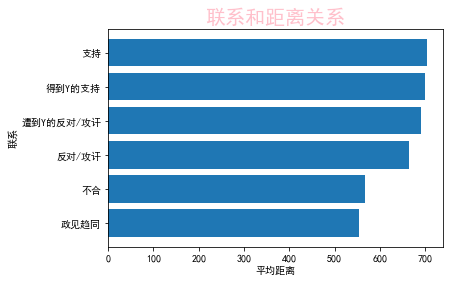

In [7]:
#方法2
plt.barh(a1.index, a1.values)
plt.title('联系和距离关系', size=20, color='pink')
plt.xlabel('平均距离')
plt.ylabel('联系')
plt.show

支持和对抗的关系筛选

In [8]:
#支持型关系
df2.query('联系=="支持"or 联系=="政见趋同" or 联系=="得到Y的支持" ')['Distance 距离'].mean()

685.6485615160855

In [9]:
#对抗型关系筛选
df2.query('联系=="不合"or 联系=="遭到Y的反对/攻讦" or 联系=="反对/攻讦"')['Distance 距离'].mean()

654.5744813763426

## 指数年之差

In [10]:
df2['指数年之差'] = abs(df2['Index year'] - df2['Assoc. Index Year'])
df2


,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID,指数年之差
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888,18.0
1,An Dun,安惇,1042,M,Zhang Shiliang,张士良,NaN,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,NaN,1,25065,NaN
2,Chen Jian(2),陈戬,1081,M,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124,27.0
3,Cheng Yu,程瑀,1087,M,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163,0.0
4,Zhang Shangying,张商英,1043,M,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,M,Ouyang Xiu,欧阳修,1007.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1066.098438,12319,1384,7.0
502,Yu Jing,余靖,1000,M,Yin Zhu,尹洙,1001.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1102.124909,12319,7104,1.0
503,Kong Daofu,孔道辅,986,M,Yang Xie,杨偕,980.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,431.228735,15939,2003,6.0
504,Liu Anshang,刘安上,1069,M,Shi Gongbi,石公弼,1061.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,165.947261,17479,13417,8.0


In [11]:
data3 = df2[['联系', '指数年之差']]
data3.gropby()

AttributeError: 'DataFrame' object has no attribute 'gropby'

In [ ]:
df2.columns

In [ ]:
df_2 = df2.copy()
df_2.drop(['Sex','Assoc. Sex','Kinship Relation','亲属关系','Kin Name','亲戚姓名','Assoc. Kinship Rel.','关系人的亲属关系','Assoc. Kin Name','关系人的亲戚姓名'],axis = 1,inplace = False)

In [ ]:
df_2.dropna(axis='index',how='all',inplace = True)
df_2

In [ ]:
#检查整行重复
df_2.duplicated().sum()

In [ ]:
#检查部分字段的重复情况
#亲戚表
df1.duplicated(['姓名','亲戚姓名']).sum()

对政治表去重

In [ ]:
df_2.drop_duplicates(inplace=True)
df_2.duplicated().sum()

In [ ]:
#对亲戚表进行去重
df_1 = df1.copy()

In [ ]:
df_1.drop_duplicates()

In [ ]:
#统计出每个官员的联系
df_2[['姓名','联系']].groupby(['姓名','联系']).agg({'联系':'count'})

行转列

In [ ]:
#行转列
a = df_2[['姓名','联系']].groupby(['姓名','联系']).agg({'联系':'count'}).unstack()
a

In [ ]:
#level参数修改，列名转换
df_2[['姓名','联系']].groupby(['姓名','联系']).agg({'联系':'count'}).unstack(level= 0)


## 取同时是官员的亲戚

In [ ]:
#取所有官员的集合
offier= set(df2['姓名'])
offier

In [ ]:
#取所有亲戚的集合
kin =set(df1['亲戚姓名'])
kin

In [ ]:
kin_offier=offier&kin
list1 = list(kin_offier)
list1

In [ ]:
df_1.drop_duplicates(inplace=True)


In [ ]:
#统计亲戚中官员数量
df_1.query('亲戚姓名=="曾布" or 亲戚姓名=="曾肇" or  亲戚姓名=="王安石" or 亲戚姓名=="王安礼" or 亲戚姓名=="章綡" or 亲戚姓名=="章縡" or 亲戚姓名=="苏轼" or 亲戚姓名=="苏辙" or 亲戚姓名=="范仲淹" or 亲戚姓名=="范纯仁" or 亲戚姓名=="范纯礼" or 亲戚姓名=="赵祯" or 亲戚姓名=="赵顼" or 亲戚姓名=="韩忠彦" or 亲戚姓名=="韩琦"')

In [ ]:
#另一种方法
df_1[df_1['亲戚姓名'].isin(list1)]

In [ ]:
#另一种方法
abc = df_1.query('亲戚姓名 in @kin_offier')
abc

In [ ]:
#修改表格并保存
a['亲戚为官数'] =abc[['亲戚姓名','姓名']].groupby('姓名').count()
a.fillna(0,inplace = True)
a.to_csv('./修改后的csv文件.csv',encoding='utf_8_sig')
a

In [ ]:
#读取刚刚保存的表格
dfdf = pd.read_csv(r'./修改后的csv文件.csv',index_col='姓名')
dfdf

In [ ]:
from  sklearn.cluster import KMeans

In [ ]:
print(KMeans(n_clusters=2,random_state=0).fit(dfdf).labels_)

In [ ]:
#给聚类定义标签
dfdf['聚类标签'] = KMeans(n_clusters=2,random_state=0).fit(dfdf).labels_
dfdf

In [ ]:
#尝试分成多组
dfdf['聚类标签'] = KMeans(n_clusters=4,random_state=0).fit(dfdf).labels_
dfdf.query("聚类标签 == 2")

In [ ]:
data1 =dfdf[['得到Y的支持','支持','政见趋同','反对/攻讦','遭到Y的反对/攻讦','不合','Unnamed: 7','聚类标签']]
data1